In [24]:
import gdax
import pandas as pd
import numpy as np


%matplotlib inline


public_client = gdax.PublicClient()

In [25]:
def diff(vals, delta=-1):
    shift = np.roll(vals, delta)
    diff = np.subtract(shift, vals)
    return diff[:delta]

# Save historical data, take number of points and granularity
from datetime import datetime, timedelta
from math import ceil
from time import sleep

def historic_rates(product, num_candles, granularity=60, max_per=200, initial=None):
    start = initial if initial else datetime.utcnow().replace(microsecond=0)
    delta = timedelta(seconds=granularity) * max_per
    full = ceil(num_candles / max_per)
    rates = []
    for i in range(1, full + 1):
        frm = start - (delta * i)
        to  = frm + delta
        print('From: {}, To: {}'.format(frm.isoformat(), to.isoformat()))
        rates.extend(public_client.get_product_historic_rates(product, start=frm.isoformat(), end=to.isoformat(), granularity=granularity))
        sleep(1)
    return rates


In [26]:

rates = historic_rates('ETH-EUR', 2000, granularity=3600)


From: 2018-01-13T11:59:31, To: 2018-01-21T19:59:31
From: 2018-01-05T03:59:31, To: 2018-01-13T11:59:31
From: 2017-12-27T19:59:31, To: 2018-01-05T03:59:31
From: 2017-12-19T11:59:31, To: 2017-12-27T19:59:31
From: 2017-12-11T03:59:31, To: 2017-12-19T11:59:31
From: 2017-12-02T19:59:31, To: 2017-12-11T03:59:31
From: 2017-11-24T11:59:31, To: 2017-12-02T19:59:31
From: 2017-11-16T03:59:31, To: 2017-11-24T11:59:31
From: 2017-11-07T19:59:31, To: 2017-11-16T03:59:31
From: 2017-10-30T11:59:31, To: 2017-11-07T19:59:31


In [28]:
times_l = [x[0] for x in rates]
prices_l = [x[4] for x in rates]
times_l.reverse()
prices_l.reverse()

times = pd.Series(times_l).astype("datetime64[s]")
time_price = pd.Series(prices_l, times)

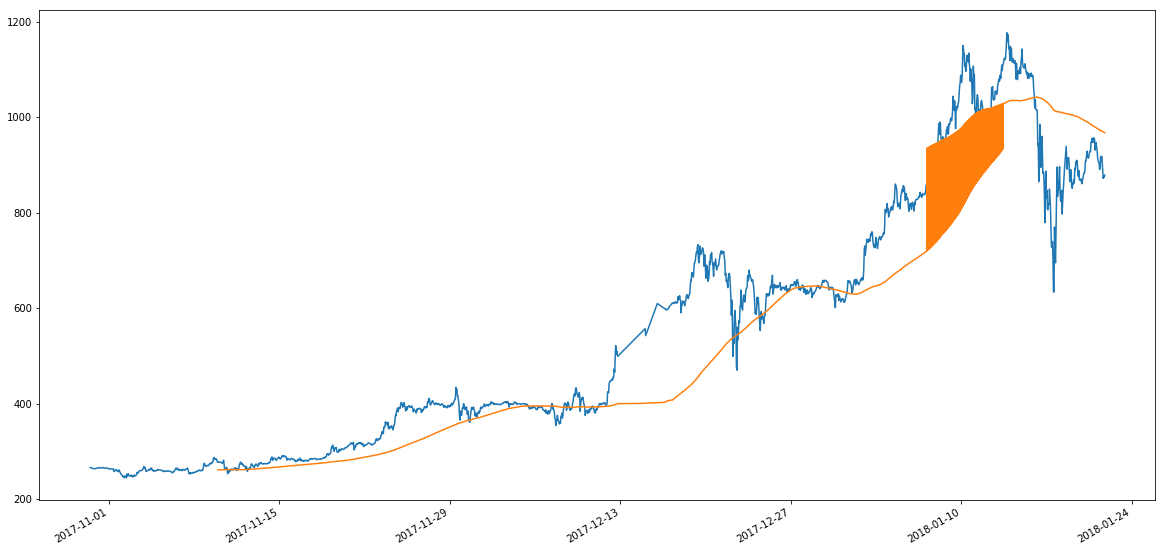

In [29]:
window = 250
mavg = time_price.rolling(window=window,center=False).mean()
ema = time_price.ewm(span=window, adjust=False).mean()


time_price.plot(figsize=(20,10))
mavg.plot(figsize=(20,10))




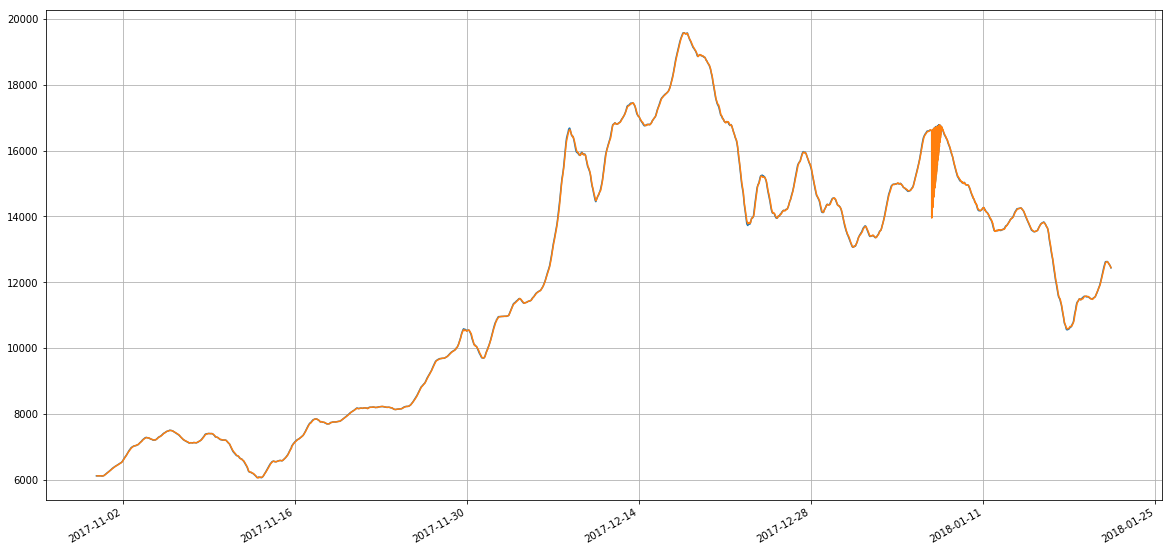

In [23]:
mavg_20 = time_price.rolling(window=20,center=False).mean()
mavg_21 = time_price.rolling(window=21,center=False).mean()
mavg_12 = time_price.rolling(window=12,center=False).mean()
mavg_4 = time_price.rolling(window=3,center=False).mean()
mavg_3 = time_price.rolling(window=3,center=False).mean()
mavg_2 = time_price.rolling(window=2,center=False).mean()

ema_10 = time_price.ewm(span=10, adjust=False).mean()
ema_8 = time_price.ewm(span=8, adjust=False).mean()
ema_23 = time_price.ewm(span=23, adjust=False).mean()


fast = mavg_20
slow = mavg_21
diff = (fast - slow) / slow
#diff.plot(figsize=(20,10), grid=True)
fast.plot(figsize=(20,10), grid=True)
slow.plot(figsize=(20,10), grid=True)
#time_price.plot(figsize=(20,10), grid=True)


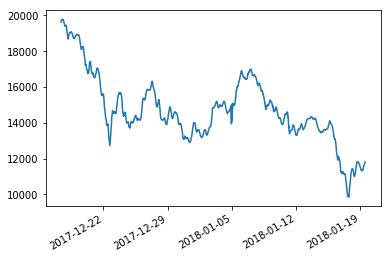

In [9]:
mvag_5 = time_price.rolling(window=5,center=False).mean()
mvag_5.plot()

In [81]:
mvag_50 = time_price.rolling(window=50,center=False).mean()
#mvag_50.plot()

In [82]:
diff_5_50 = mvag_5 - mvag_50

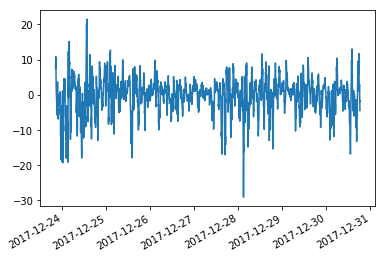

In [83]:
diff_5_50.plot()

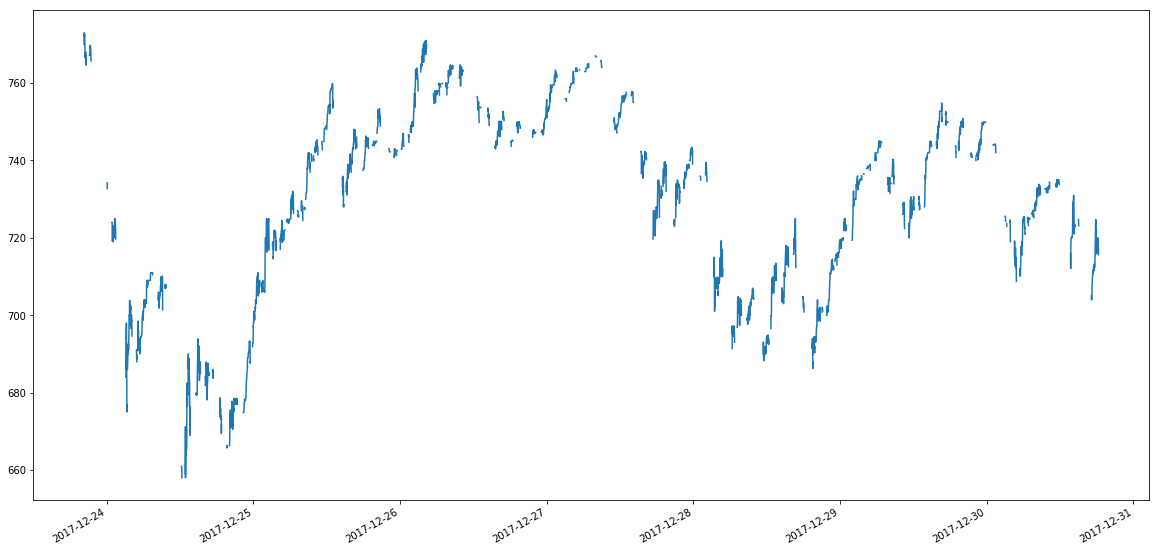

In [109]:
buys = time_price.where(diff_5_50 > 1)
buys.plot(figsize=(20,10))

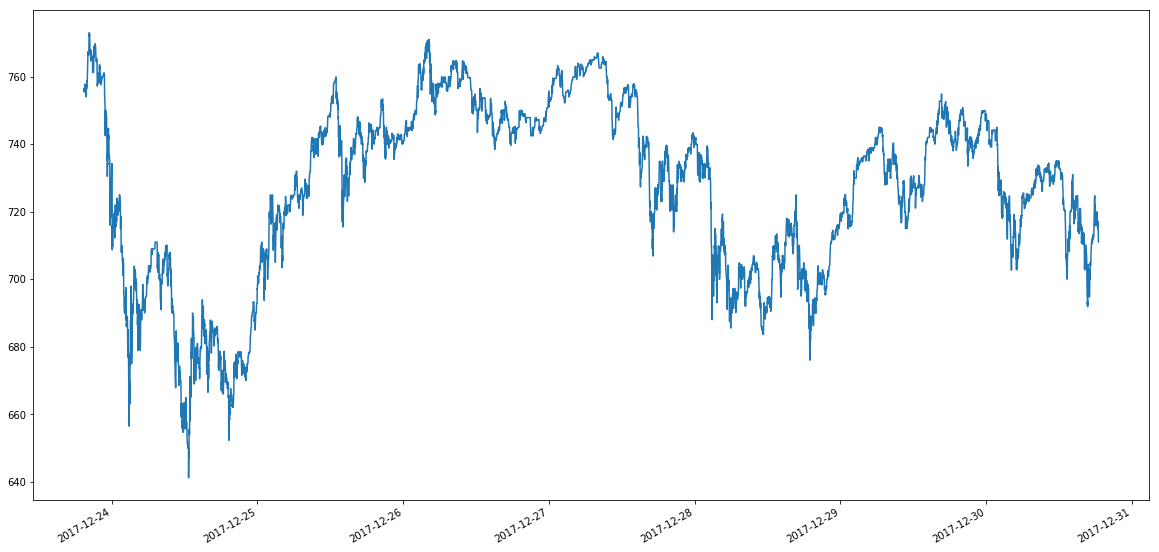

In [110]:
time_price.plot(figsize=(20,10))

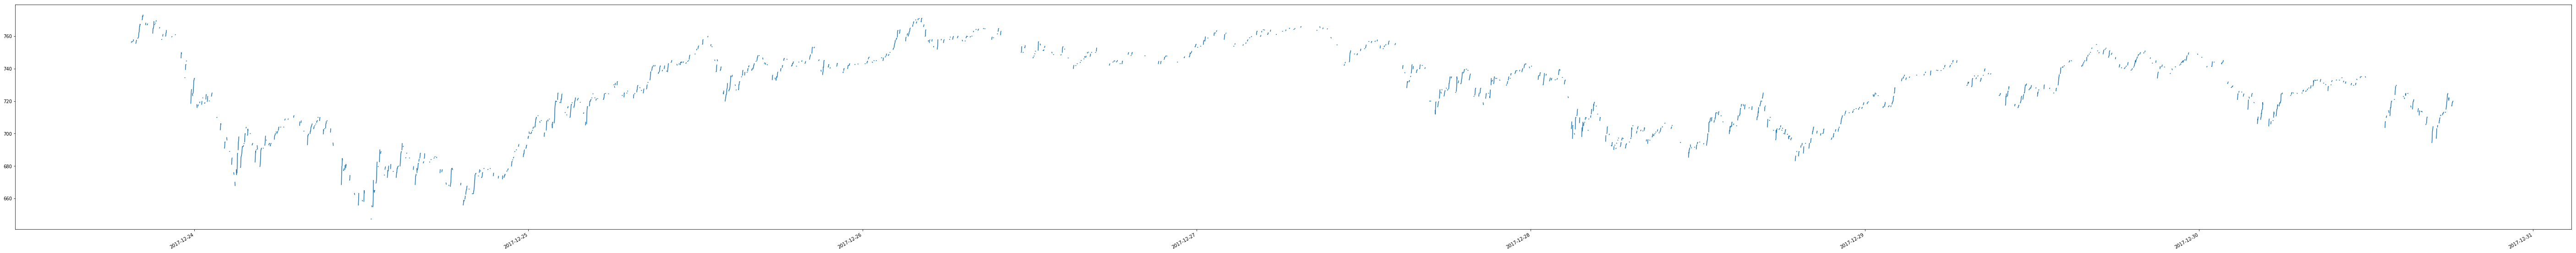

In [108]:
mvag_3 = time_price.rolling(window=3,center=False).mean()
diff_1_3 = time_price - mvag_3
#diff_1_3.plot()
buys = time_price.where(diff_1_3 > 0.2)
buys.plot(figsize=(20,10))